In [1]:
#import useful libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("Hotel Bookings.csv")

In [4]:
#see some top rows
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
#see unique value for hotel
df.hotel.unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [6]:
#summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
df.shape

(119390, 32)

In [8]:
#check null values
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
#unique value count
df.hotel.value_counts()
#it is an imbalaced datset

hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64

In [12]:
df.country.value_counts()

country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
MRT        1
KIR        1
SDN        1
ATF        1
SLE        1
Name: count, Length: 177, dtype: int64

In [18]:
#drop company column as it has mostly nan values
df=df.drop(["company"], axis=1)

In [19]:
df.isna().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             488
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             16340
days_in_waiting_list                  0


In [20]:
#since all nAn options there is not much null values so we will fill them with 0
df.fillna(0,inplace=True)

In [21]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [25]:
df["arrival_date_month"].value_counts()

arrival_date_month
August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: count, dtype: int64

In [27]:
from sklearn.preprocessing import OrdinalEncoder

ode=OrdinalEncoder()

df["arrival_date_month"]=ode.fit_transform(df[["arrival_date_month"]])

In [28]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,5.0,27,1,0,0,2,...,3,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,5.0,27,1,0,0,2,...,4,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,5.0,27,1,0,1,1,...,0,No Deposit,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,5.0,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,5.0,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [29]:
df["arrival_date_month"]

0         5.0
1         5.0
2         5.0
3         5.0
4         5.0
         ... 
119385    1.0
119386    1.0
119387    1.0
119388    1.0
119389    1.0
Name: arrival_date_month, Length: 119390, dtype: float64

In [30]:
df.customer_type.unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [50]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
df_new=ohe.fit_transform(df[["customer_type"]]).toarray()

In [51]:
df_new=pd.DataFrame(df_new,columns=ohe.get_feature_names_out())

In [54]:
df=pd.concat([df,df_new],axis=1)

In [55]:

df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,Resort Hotel,0,342,2015,5.0,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,0.0,0.0,1.0,0.0
1,Resort Hotel,0,737,2015,5.0,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,0.0,0.0,1.0,0.0
2,Resort Hotel,0,7,2015,5.0,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,0.0,0.0,1.0,0.0
3,Resort Hotel,0,13,2015,5.0,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,0.0,0.0,1.0,0.0
4,Resort Hotel,0,14,2015,5.0,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,2015-07-03,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,1.0,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,0.0,0.0,1.0,0.0
119386,City Hotel,0,102,2017,1.0,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,0.0,0.0,1.0,0.0
119387,City Hotel,0,34,2017,1.0,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,0.0,0.0,1.0,0.0
119388,City Hotel,0,109,2017,1.0,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,0.0,0.0,1.0,0.0


<Axes: ylabel='hotel'>

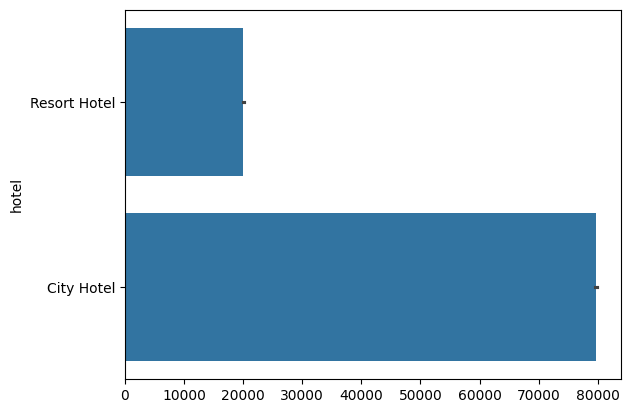

In [ ]:
#clearly this is a imbalaced dataset
sns.barplot(df.hotel)

In [ ]:
#we can make this balaced by oversampling as undersampling will lead in some data loss


In [58]:
df=df.drop(["customer_type"],axis=1)

In [60]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date', 'customer_type_Contract',
       'customer_type_Group', 'customer_type_Transient',
       'customer_type_Transient-Party'],
      dtype='object')

In [63]:
#deposit_type
df.deposit_type.value_counts()

deposit_type
No Deposit    104641
Non Refund     14587
Refundable       162
Name: count, dtype: int64

In [65]:
df_numerical=df.drop(["meal","country","market_segment","distribution_channel","reserved_room_type","deposit_type","reservation_status","reservation_status_date"],axis=1)

In [66]:
df_numerical.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                float64
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
assigned_room_type                 object
booking_changes                     int64
agent                             float64
days_in_waiting_list                int64
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests           int64
customer_type_Contract            float64
customer_type_Group               

In [69]:
df_numerical["hotel"]=ode.fit_transform(df_numerical[["hotel"]])

In [71]:
df_numerical=df_numerical.drop(["assigned_room_type"],axis=1)

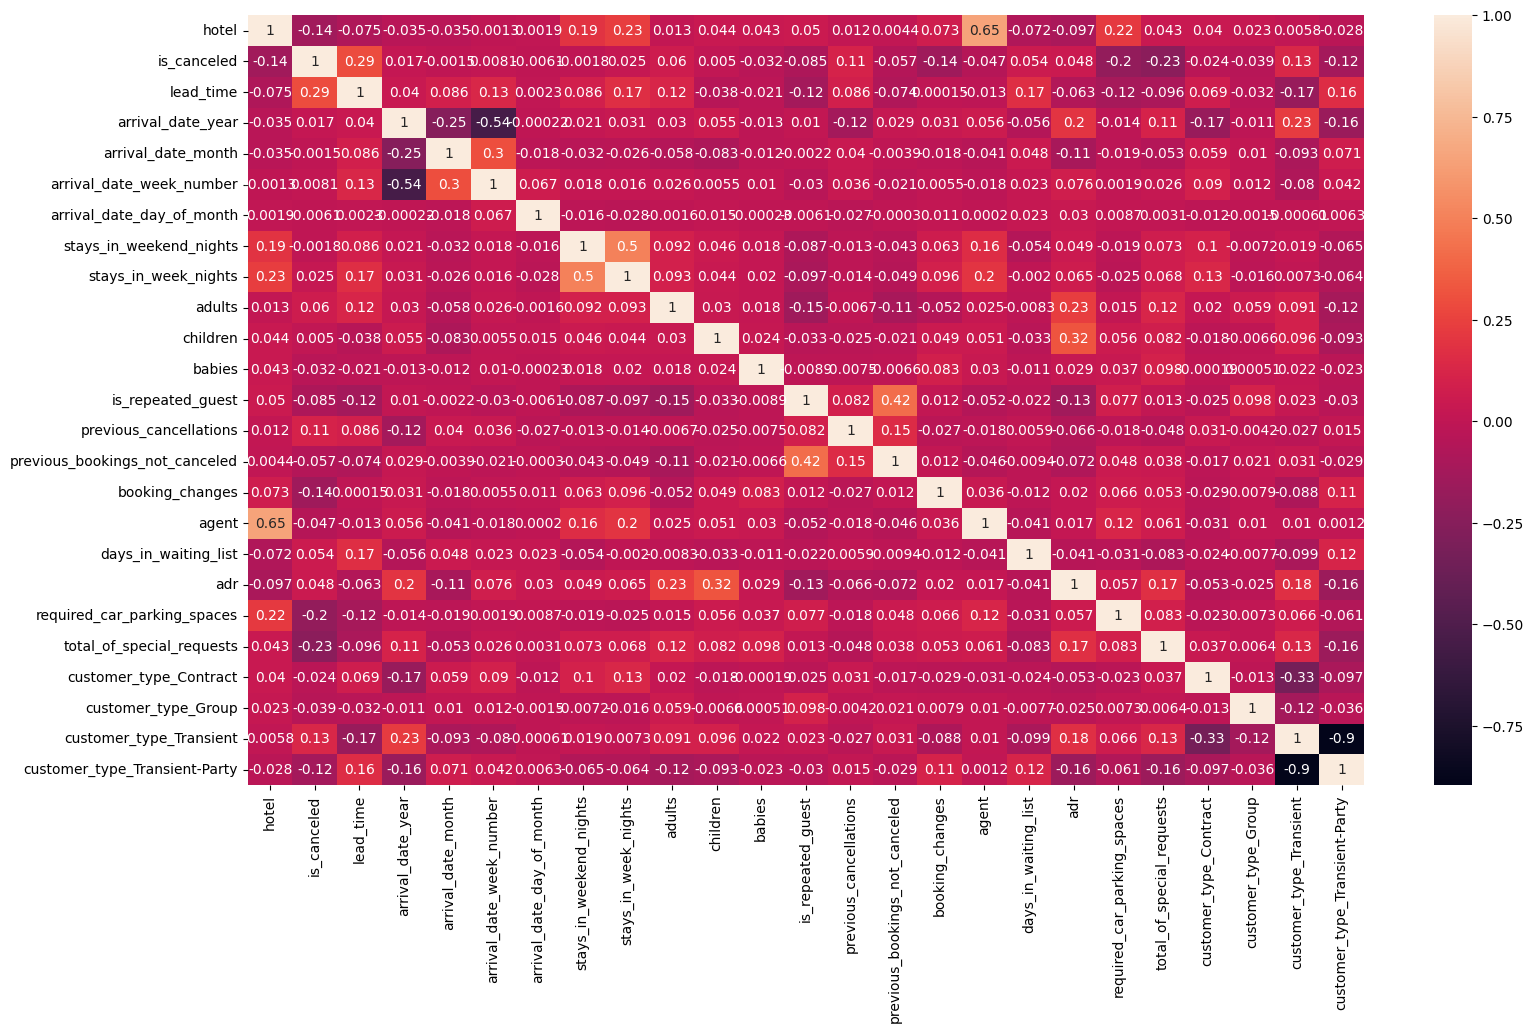

In [78]:
#we can check the correlation also
corr=df_numerical.corr()
plt.figure(figsize=(18,10))
sns.heatmap(corr,annot=True)
plt.show()

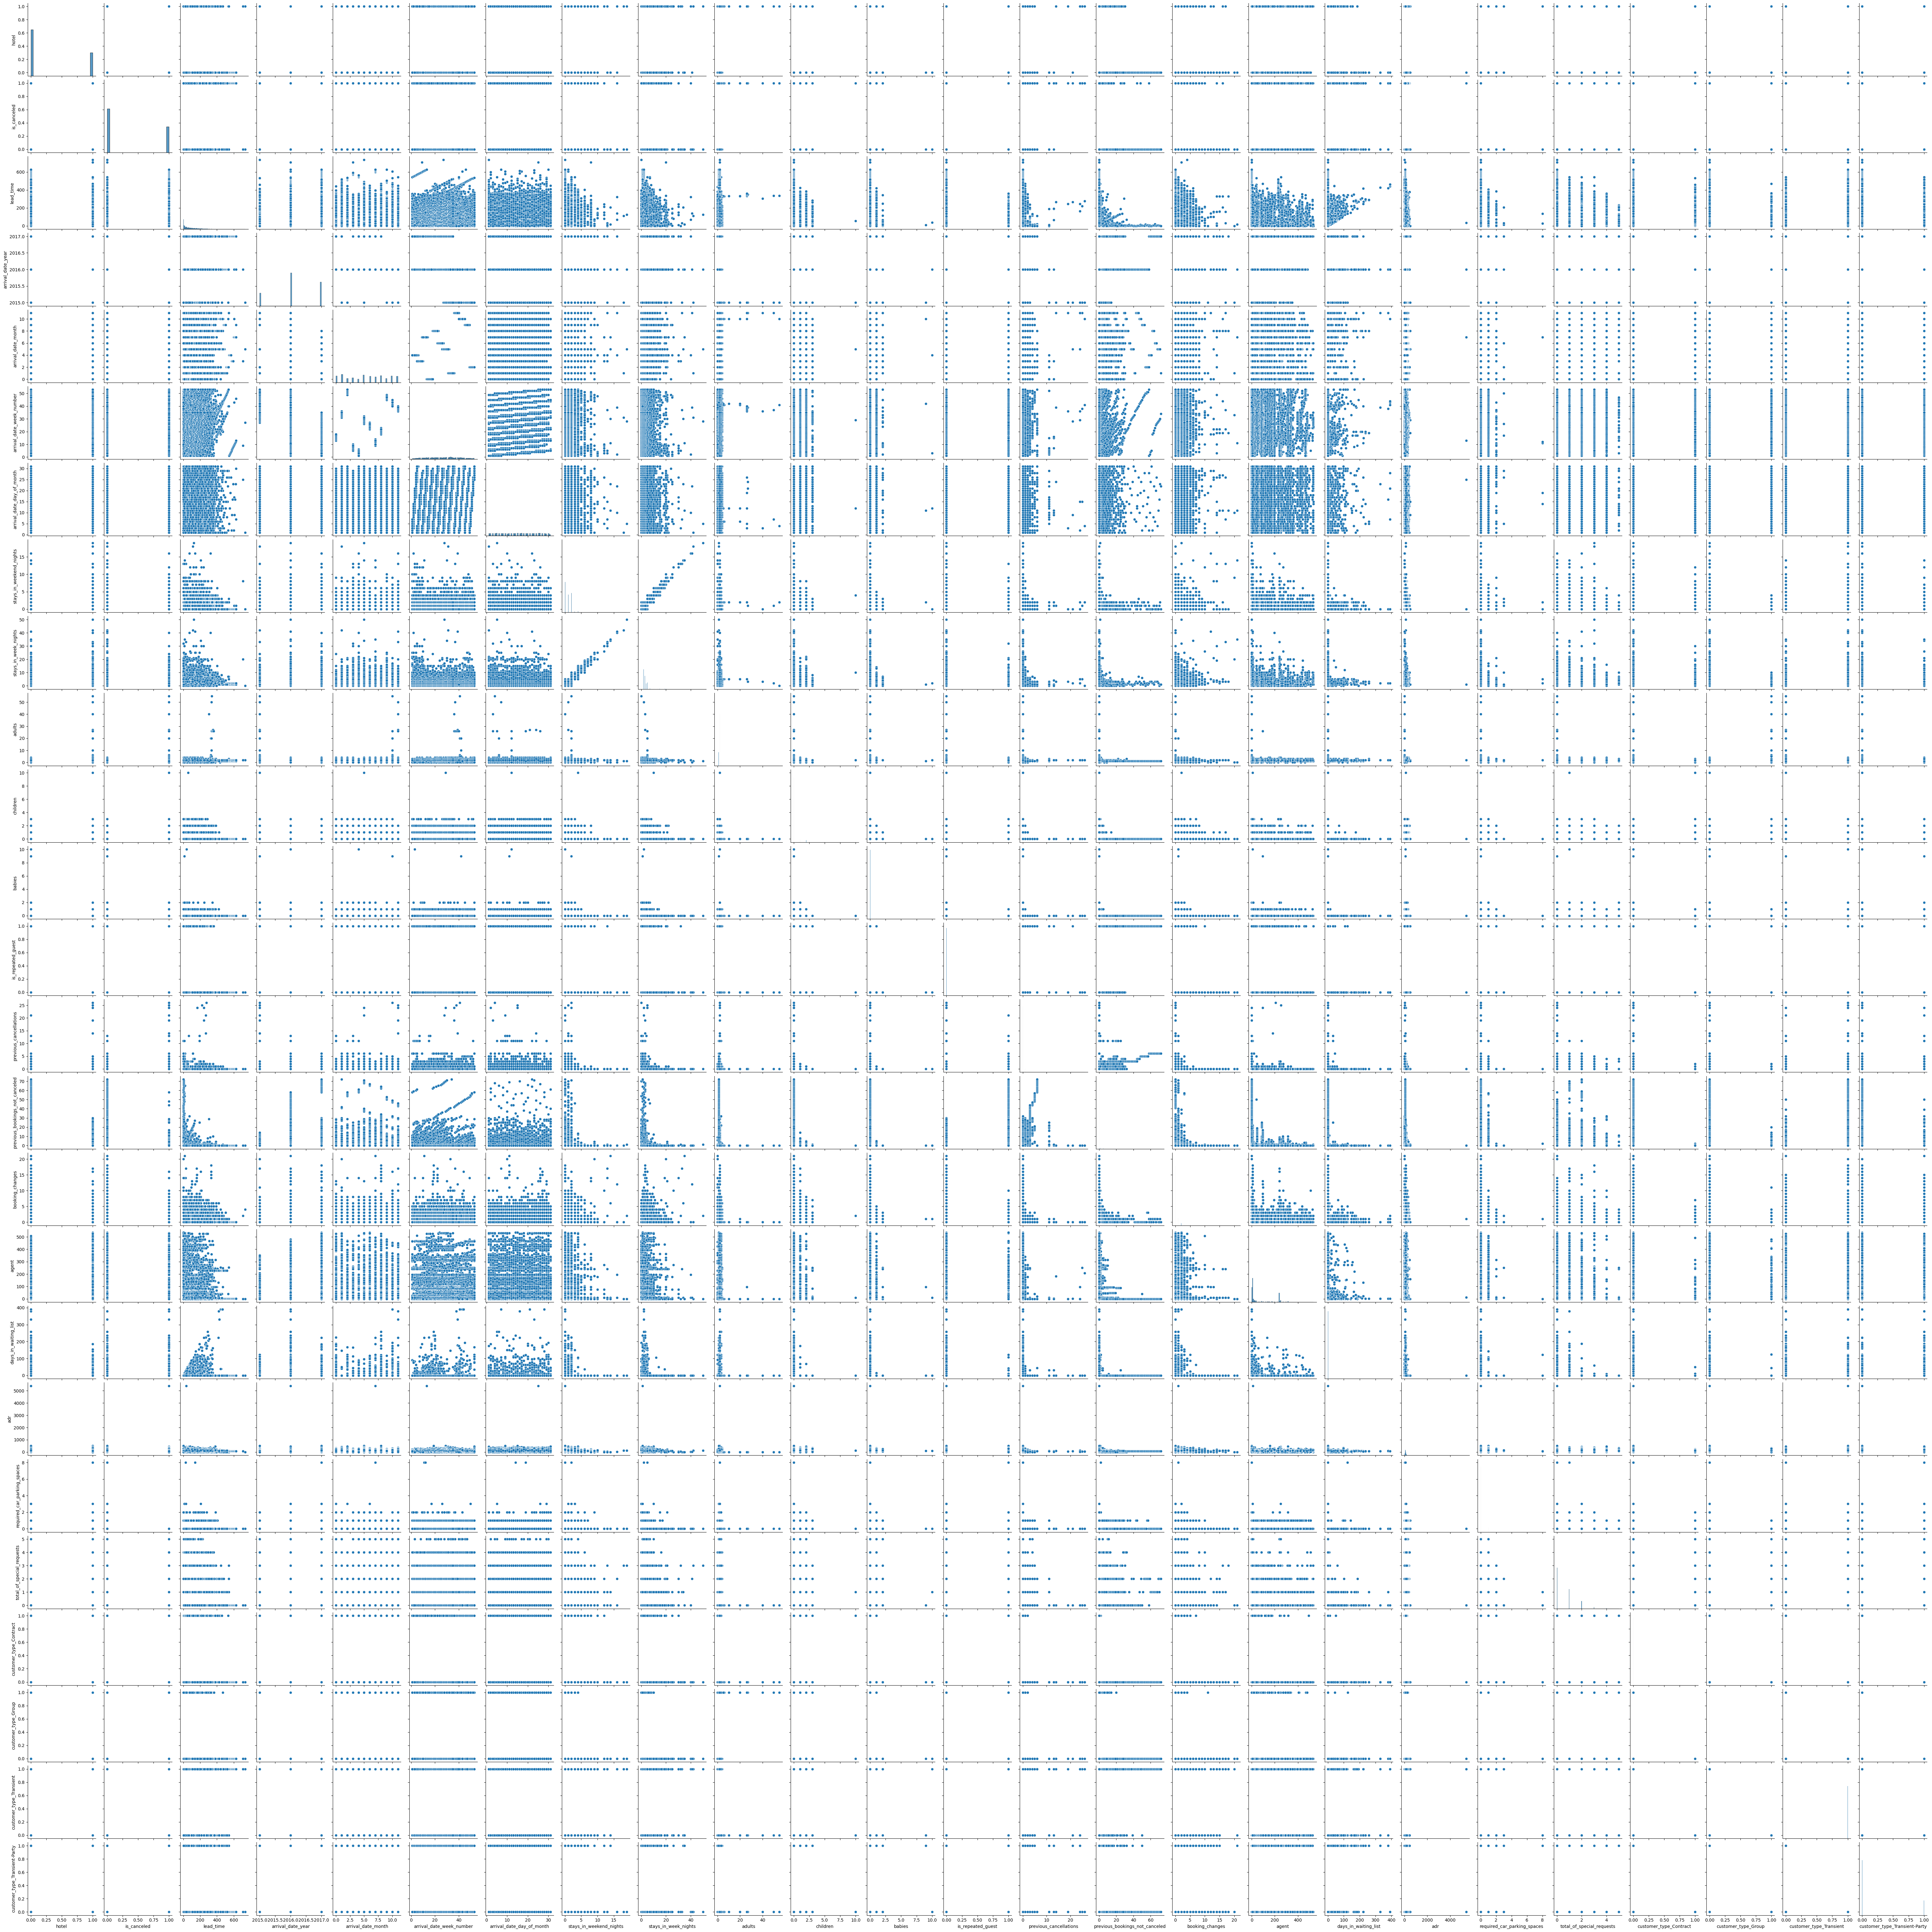

In [79]:
sns.pairplot(df_numerical)